<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

In [2]:
#Preparacion de los datos

#Inicializamos librerias y dataset
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

dataset=pandas.read_csv("human-freedom-index-2019.csv")

#Filtramos las columnas relevantes a nuestro análisis
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

#Limpiamos los datos, transformando las columnas al formato correcto
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [3]:
max_series = dataset[important_cols].max(numeric_only=True)
min_series = dataset[important_cols].min(numeric_only=True)
min_max_df = pandas.concat([max_series, min_series], axis=1, names=['max', 'min'])
min_max_df.columns = ['max', 'min']
min_max_df

,max,min
year,2017.00,2008.00
pf_identity_legal,10.00,0.00
pf_identity_sex_male,10.00,0.00
pf_identity_sex_female,10.00,0.00
pf_identity_sex,10.00,0.00
pf_identity_divorce,10.00,0.00
pf_identity,10.00,0.00
pf_score,9.56,2.22
pf_rank,162.00,1.00
ef_score,9.11,2.58



  2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  

La manera adecuada dependerá de la información que querramos obtener de dicha comparativa. No es lo mismo, por ejemplo, el querer analizar los valores actuales de cada país que analizar la evolucion que tuvo cada uno a lo largo de los años.
De esta manera, podemos darnos una idea general de ambos paises en los últimos años usando el promedio (o la mediana en el caso de que hayan habido cambios significativos durante dichos periodos). Si en cambio quisieramos destacar mas los cambios que fueron ocurriendo a lo largo del tiempo, nos convendría mas utilizar todos los valores de los cuales tenemos registro.


  3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  

In [19]:
dataset_LatAm = dataset.loc[dataset['region'] == 'Latin America & the Caribbean']
print('############################### pf_identity ###############################')
print('')
print('Media:                 MUNDIAL ', format(dataset['pf_identity'].mean(), '.4f'), '       ', 'LA y Caribe ', format(dataset_LatAm['pf_identity'].mean(), '.4f'))
print('Mediana:               MUNDIAL ', format(dataset['pf_identity'].median(), '.4f'), '       ', 'LA y Caribe', format(dataset_LatAm['pf_identity'].median(), '.4f'))
print('Desviacion estandar:   MUNDIAL ', format(dataset['pf_identity'].std(), '.4f'), '       ', 'LA y Caribe ', format(dataset_LatAm['pf_identity'].std(), '.4f'))
print('')
print('################################ hf_score #################################')
print('')
print('Media:                 MUNDIAL ', format(dataset['hf_score'].mean(), '.4f'), '       ', 'LA y Caribe ', format(dataset_LatAm['hf_score'].mean(), '.4f'))
print('Mediana:               MUNDIAL ', format(dataset['hf_score'].median(), '.4f'), '       ', 'LA y Caribe ', format(dataset_LatAm['hf_score'].median(), '.4f'))
print('Desviacion estandar:   MUNDIAL ', format(dataset['hf_score'].std(), '.4f'), '       ', 'LA y Caribe ', format(dataset_LatAm['hf_score'].std(), '.4f'))
print('')

############################### pf_identity ###############################

Media:                 MUNDIAL  7.2806         LA y Caribe  8.5822
Mediana:               MUNDIAL  8.8000         LA y Caribe 10.0000
Desviacion estandar:   MUNDIAL  3.1816         LA y Caribe  1.8758

################################ hf_score #################################

Media:                 MUNDIAL  6.9782         LA y Caribe  7.0370
Mediana:               MUNDIAL  6.9000         LA y Caribe  7.0200
Desviacion estandar:   MUNDIAL  1.0562         LA y Caribe  0.6349



Consideramos que las comparativas son válidas, ya que en ambos casos nos permite darnos una idea general de que cual es el nivel de similitud a nivel regional en relación al mundo entero para cada una de las variables estudiadas (asumiendo que en todos los casos se tomaron en cuenta los mismo criterios a la hora de recolectar los valores correspondientes).


  4. ¿Tiene sentido calcular la moda?
  

Si bien se podría calcular la moda facilmente y nos daría un resultado matemático "valido", analíticamente no nos aporta ningún valor ya que en variables cuantitativas continuas suelen presentar baja o nula repetición de valores. 
Una alternativa aplicable es definir intervalos sobre la variable y calcular la moda sobre los intervalos en vez de los valores en sí mismos.


  5. ¿Cómo pueden sanearse los valores faltantes?
  

Dependiendo del tipo de analisis que necesitemos llevar a cabo podemos aplicar distinntas alternativas. Algunas de ellas pueden ser, por ejemplo, eliminar las filas donde hayan huecos en el dataset o eliminar las columnas dependiendo de como nos afecten en nuestros calculos. Una tercera opción es rellenar esos espacios vacios con valores creados en base a los valores de los cuales si disponemos.
Obviamente la opcion que se elija debe ser debidamente justificada en base a las observaciones que se quieren realizar sobre la informaciónm


  6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  

Existen ciertos registros que pueden ser considerados como "outliers" al estar lo suficientemente alejados de la media de la variable. De todas formas, primero debe analizarse si estos valores represetan información significativa dentro de nuestro análisis o si corresponden a algún tipo de error durante el muestreo.

Para poder detectarlos, un método sencillo y eficaz es utilizar un diagrama de cajas. Dentro del mismo podremos visualizar facilmente tanto los rangos de los cuartiles, como los valores extremos (inferiores y superiores).

A continuación, generaremos los diagramas de cajas para la variable "pf_identity", primero de manera global y luego clasificados por region. Dentro de este último podemos ver que se desprenden los puntos atípicos, sin embargo al considerar todas las regiones como una unidad quedan incluidos dentro del "bigote" (es decir, son outliers por grupo).

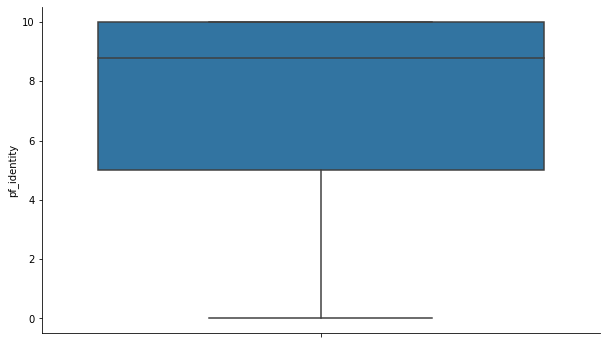

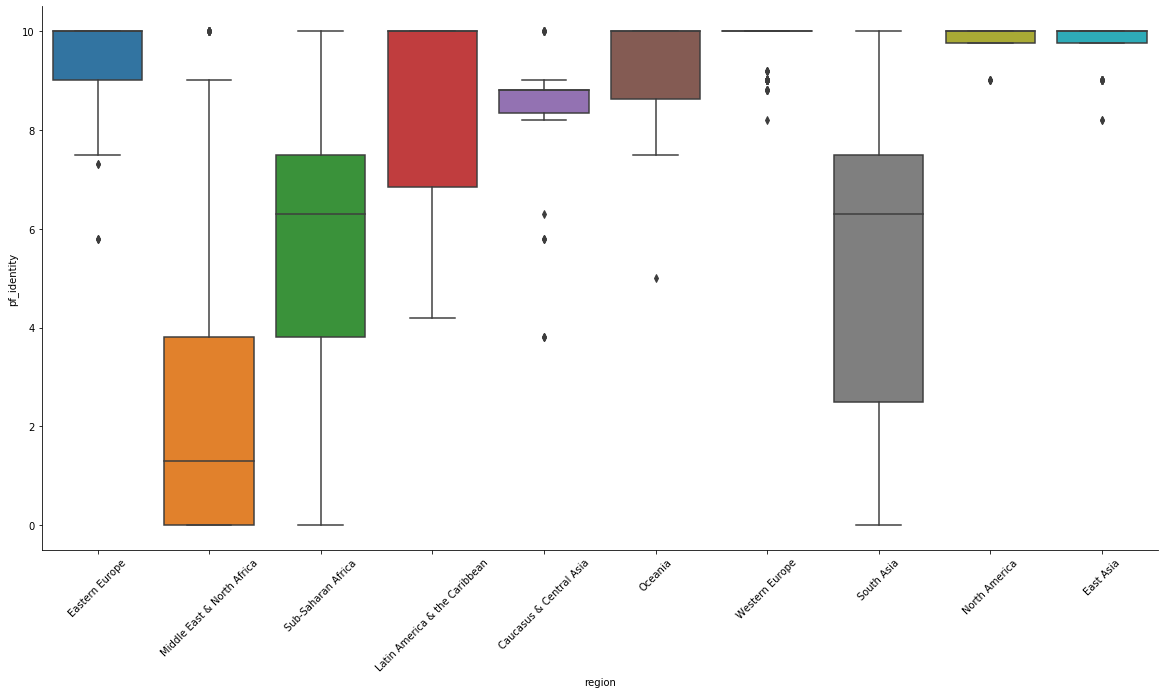

In [26]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset, y='pf_identity')
seaborn.despine()

plt.figure(figsize=(20,10))
seaborn.boxplot(data=dataset, y='pf_identity', x='region')
plt.xticks(rotation=45)
seaborn.despine()

Al analizar nuestra segunda variable, notamos que el comportamiento no es el mismo. En este caso, los outliers quedan aparentes independientemente de si se utiliza la subclasificación o no, por lo que concluimos que son outliers globales.

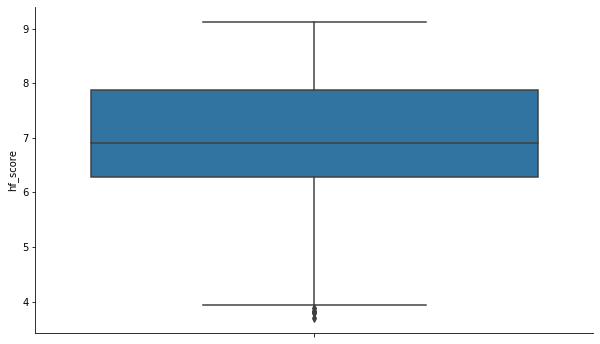

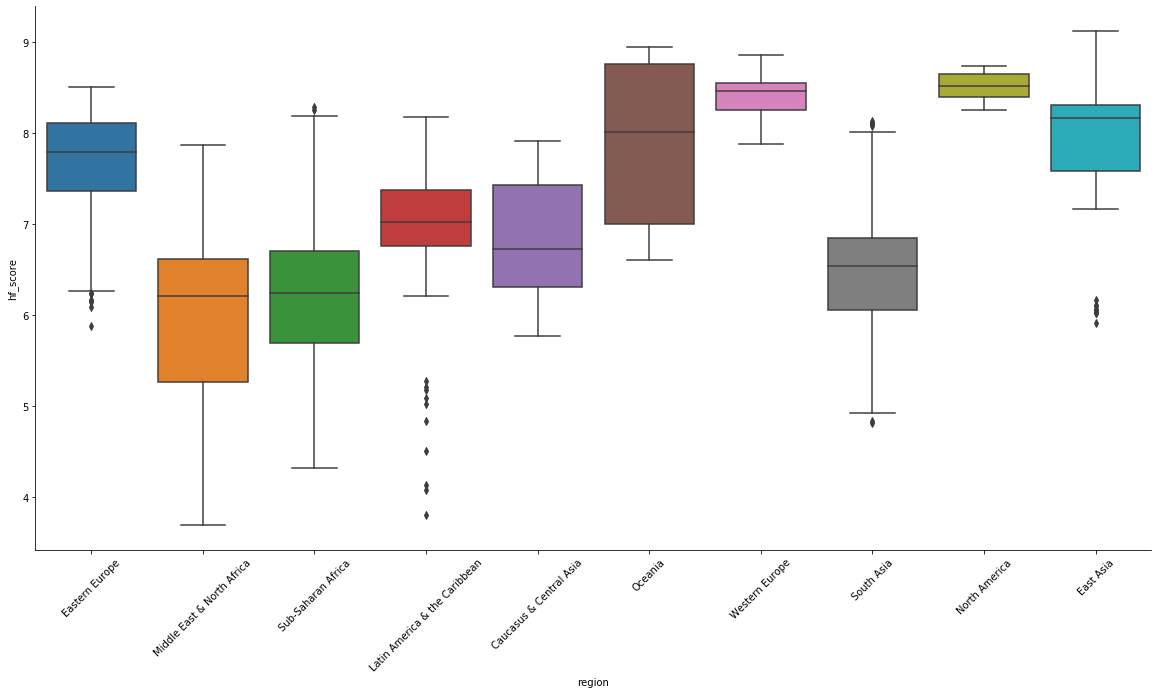

In [29]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset, y='hf_score')
seaborn.despine()

plt.figure(figsize=(20,10))
seaborn.boxplot(data=dataset, y='hf_score', x='region')
plt.xticks(rotation=45)
seaborn.despine()

En estos casos particulares, entendemos que es necesario no eliminar los outliers al momento de realizar nuestros análisis ya que pueden representar, por ejemplo, las distintas realidades que se viven de país a país. En este último gráfico especificamente, podemos ver un rango más amplio de valores en Latino América y el Caribe para los valores de la variable "hf_score" lo cual se corresponde con la disparidad existente entre los distintos paises que conforman una región tan extensa. Consideramos que la variedad en los valores (desde menores a 4 hasta mayores a 9) asi como la distribución de los mismos nos aporta información importante respecto al grupo y las métricas que se quieren estudiar.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

(5, 9)

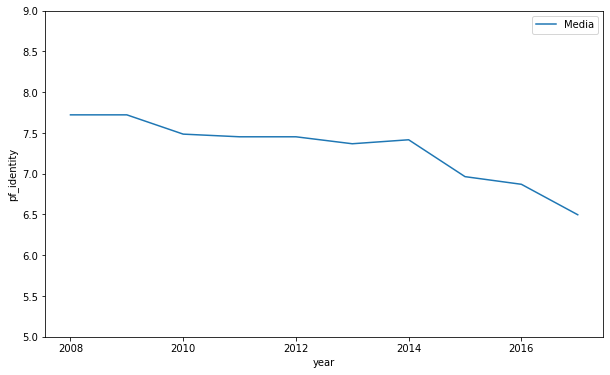

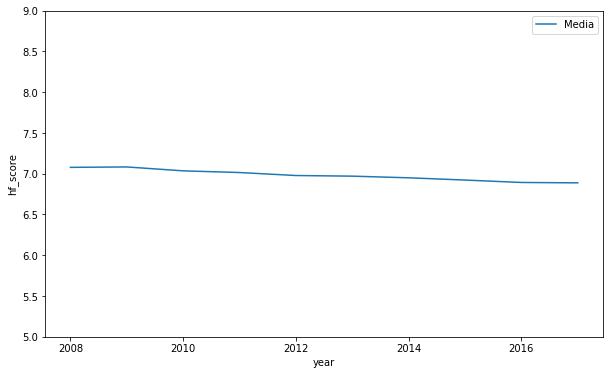

In [36]:
media_anio_1=dataset.groupby('year', as_index=False).agg({"pf_identity": "mean"})
plt.figure(figsize=(10,6))
seaborn.lineplot(data=media_anio_1, x='year', y='pf_identity', label='Media')
plt.ylim(5, 9)
media_anio_2=dataset.groupby('year', as_index=False).agg({"hf_score": "mean"})
plt.figure(figsize=(10,6))
seaborn.lineplot(data=media_anio_2, x='year', y='hf_score', label='Media')
plt.ylim(5, 9)